In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_absolute_error,mean_squared_error

pi  = np.pi
cos = lambda x: np.cos(x)


In [2]:
def Brannin(x1,x2):
    a = 1 
    b = 5.1/(4*pi**2)
    c = 5/pi
    r = 6
    s = 10
    t = 1/(8*pi)
    return a*(x2-b * x1**2 + c*x1 - r)**2 + s*(1-t)*cos(x1) + s

In [3]:
x1 = np.linspace(-5,10,800)
x2 = np.linspace(0,15,800)

X1, X2 = np.meshgrid(x1,x2)

z = np.array([[Brannin(xx1,xx2) for xx1 in x1] for xx2 in x2]) 

In [ ]:
Xt = []
for xx1 in x1:
    for xx2 in x2:
        Xt.append([xx1,xx2])     
Xt = np.array(Xt)
YT = np.array([Brannin(xx1,xx2) for xx1,xx2 in Xt])

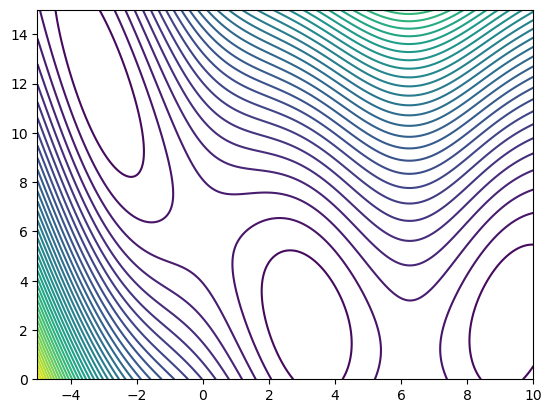

In [4]:
fig, ax = plt.subplots(1,1)
ax.contour(X1,X2,z,levels=50)

In [13]:
# Data generation
tb = np.random.random((900,2))*15
tb[:,0] = tb[:,0]-5

Xt = []
for xx1 in x1:
    for xx2 in x2:
        Xt.append([xx1,xx2])
        
Xt = np.array(Xt)
YT = np.array([Brannin(xx1,xx2) for xx1,xx2 in Xt])

tby = np.array([Brannin(xx1,xx2) for xx1,xx2 in tb])

In [14]:
Brannin(*tb[0])

48.13682197426475

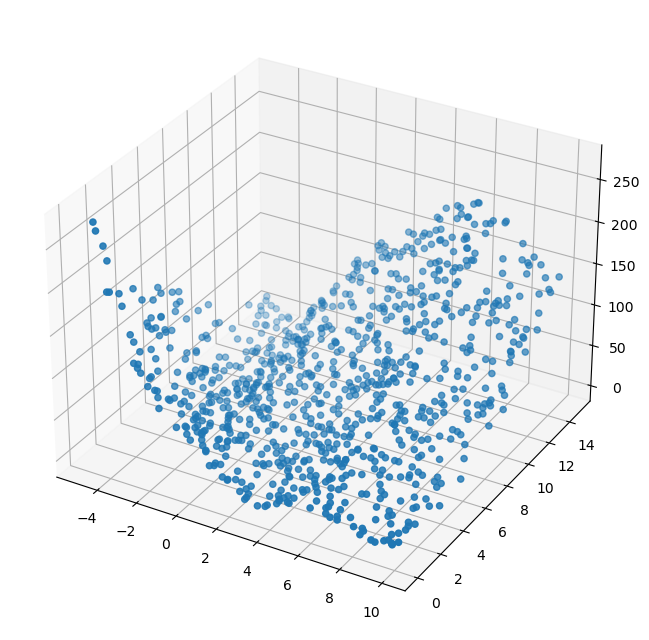

In [15]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.scatter3D(tb[:,0],tb[:,1],tby)

In [31]:
kernel = 1.0 * RBF(length_scale=1e1, length_scale_bounds=(5e-1,1e2))
gpr = GaussianProcessRegressor(kernel=kernel,alpha=2.0)
gpr.fit(tb,tby)

GaussianProcessRegressor(alpha=2.0, kernel=1**2 * RBF(length_scale=10))

In [33]:
Yp = gpr.predict(Xt)

In [34]:
mean_squared_error(YT,Yp)

0.03116334887921087

In [35]:
zp = np.array([[gpr.predict([[xx1,xx2]])[0] for xx1 in x1] for xx2 in x2]) 

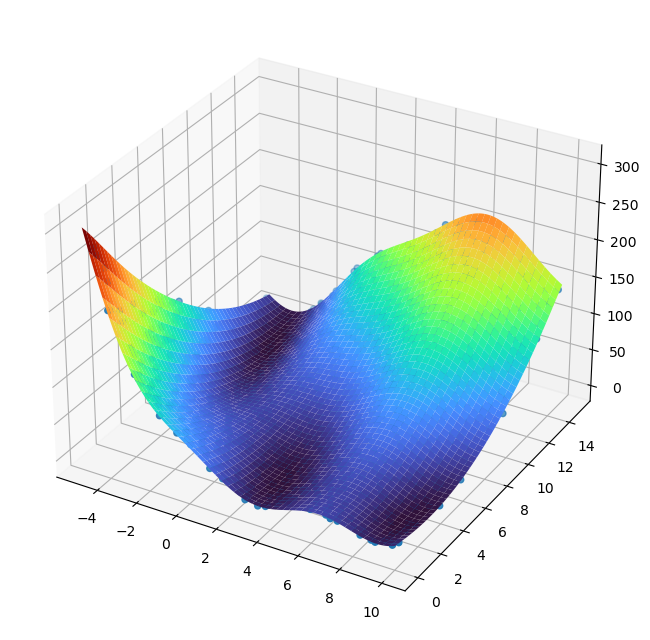

In [36]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(X1,X2,zp,cmap='turbo')
ax.scatter3D(tb[:,0],tb[:,1],tby)

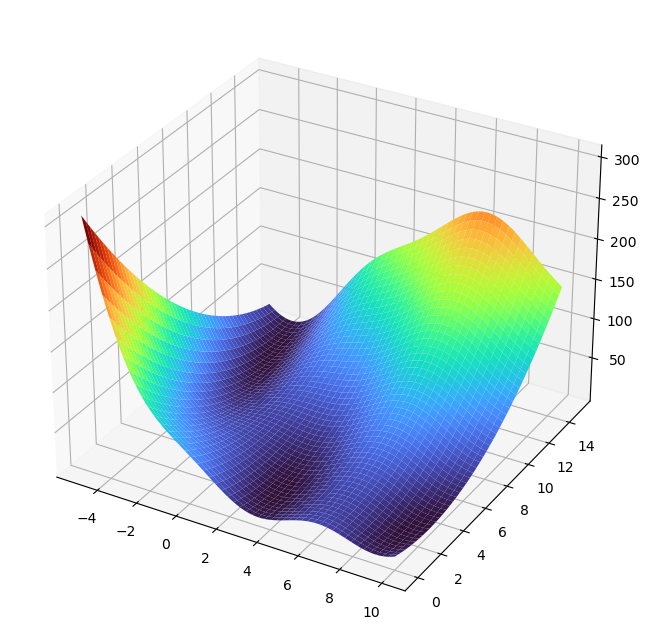

In [37]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(X1,X2,z,cmap='turbo')

Attempting an acquisition function

In [45]:
def GS_x(x,x_list):
    distances = np.zeros_like(x_list)

    for ii,xx in enumerate(x_list):
        distances[ii] = np.sum(np.abs(x-xx))
    return np.min(distances)

def select_new_samples_single_episode(candidates, x_init, y_init, model):
    Gss = [GS_x(candidate,x_init) for candidate in candidates]
    cand = np.argmax(Gss)
    x_init.append(candidates[cand])
    y_init.append(Brannin(candidates[cand][0],candidates[cand][1]))
    candidates.pop(cand)
    model.fit(np.array(x_init),np.array(y_init))
    return None

In [40]:
# Data generation
tb = np.random.random((10,2))*15
tb[:,0] = tb[:,0]-5

tby = np.array([Brannin(xx1,xx2) for xx1,xx2 in tb])

In [41]:
kernel = 1.0 * RBF(length_scale=1e1, length_scale_bounds=(5e-1,1e2))
gpr = GaussianProcessRegressor(kernel=kernel,alpha=2.0)
gpr.fit(tb,tby)

GaussianProcessRegressor(alpha=2.0, kernel=1**2 * RBF(length_scale=10))

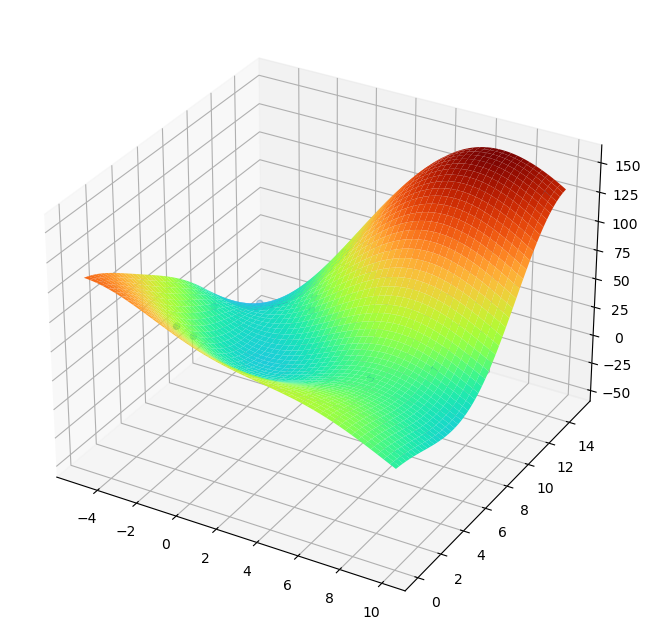

In [42]:
zp = np.array([[gpr.predict([[xx1,xx2]])[0] for xx1 in x1] for xx2 in x2]) 
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(X1,X2,zp,cmap='turbo')
ax.scatter3D(tb[:,0],tb[:,1],tby)

In [43]:
Yp = gpr.predict(Xt)
mean_squared_error(YT,Yp)

726.9828205338936

In [48]:
candidates = np.random.random((400,2))*15
candidates[:,0] = candidates[:,0]-5

tbl = list(tb)
tbyl = list(tby)

candl = list(candidates)

for i in range(10):
    select_new_samples_single_episode(candl,tbl,tbyl,gpr)

/Users/tingua/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


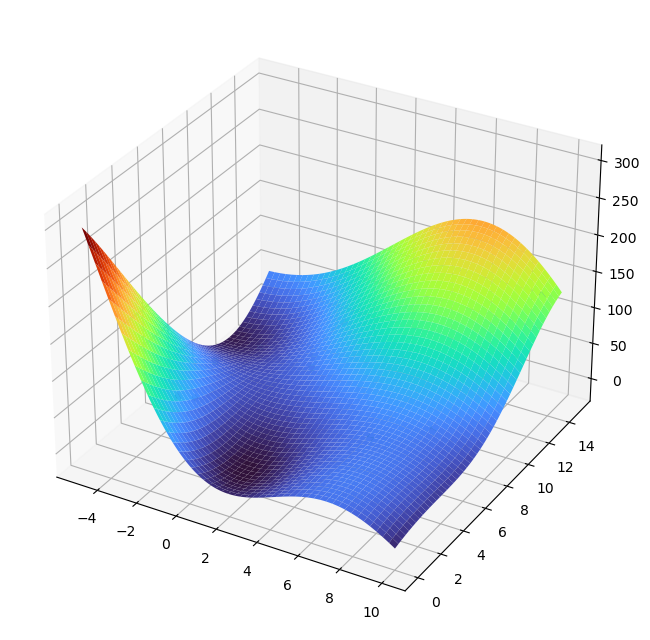

In [52]:
zp = np.array([[gpr.predict([[xx1,xx2]])[0] for xx1 in x1] for xx2 in x2]) 
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(X1,X2,zp,cmap='turbo')
ax.scatter3D(tb[:,0],tb[:,1],tby)

In [53]:
Yp = gpr.predict(Xt)
mean_squared_error(YT,Yp)

166.84338892980182

In [54]:
len(tbl)

20

In [55]:
for i in range(10):
    select_new_samples_single_episode(candl,tbl,tbyl,gpr)

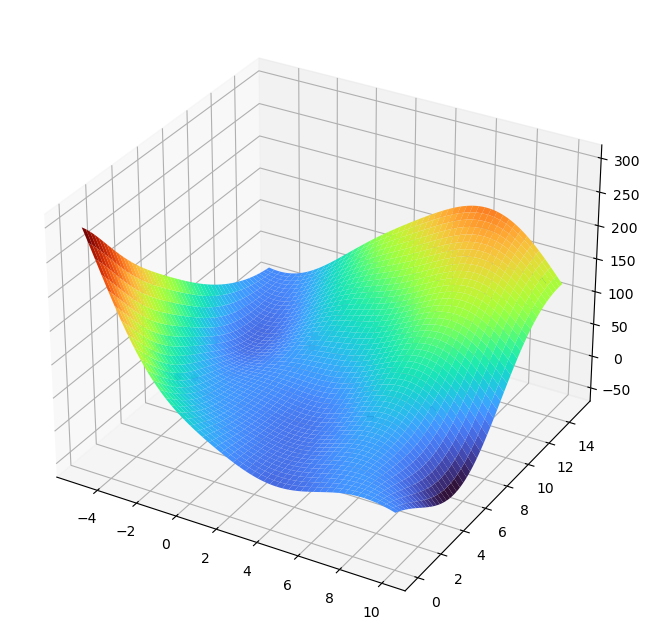

In [56]:
zp = np.array([[gpr.predict([[xx1,xx2]])[0] for xx1 in x1] for xx2 in x2]) 
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(X1,X2,zp,cmap='turbo')
ax.scatter3D(tb[:,0],tb[:,1],tby)

In [57]:
Yp = gpr.predict(Xt)
mean_squared_error(YT,Yp)

61.405563385931565